<h1 style="color:gray;"> Import Packages and Functions </h1>

In [767]:
#Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#DB packages
import pyodbc

#time packages
import time
import datetime

#html communication package
import requests as r

#Packages for Machine Learning
import researchpy as rp
import missingno as msno
from sklearn.utils import resample

#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV  

#Data pre procces package
from sklearn.model_selection  import train_test_split

#For scale transformations
from sklearn.preprocessing import MinMaxScaler

#Random Forest Algorithim
from sklearn.ensemble import RandomForestRegressor

In [768]:
#Saving Model
import pickle
from joblib import dump, load

#Current Round API

https://api.cartolafc.globo.com/rodadas
https://api.cartolafc.globo.com/clubes
https://api.cartolafc.globo.com/partidas
https://api.cartolafc.globo.com/atletas/mercado

#Historic Info
https://github.com/henriquepgomide/caRtola/tree/master/data

[1]H. Gomide e A. Gualberto, CaRtola: Extração de dados da API do CartolaFC, análise exploratória dos dados e modelos preditivos em R e Python. https://github.com/henriquepgomide/caRtola/. 2020.

<h2 style="color:gray;"> Goal: The goal is predict points on the next round for a specific player based on current round data </h2>

<p>Based on points prediction you can evaliuate which is the best pick</p>

In [769]:
def download_data(root, years, rodadas):    
        
    for ano in years:
        for rodada in rodadas:
            file = root+"/"+ano+"/rodada-"+rodada+".csv"
            print(file,end='\r',flush=True)
            try:
                df = pd.read_csv(file)
                df['ano'] = int(ano)
                df['rodada']= int(rodada)
                df.to_excel("C:\\Users\\Matheus\\Documents\\projetos_github\\AI\\cartola\\data\\"+ano+"_"+rodada+".xlsx")
            except:
                pass
            
    
    return history

In [770]:
def read_data(root, years, rodadas):
    
    file = file ="C:\\Users\\Matheus\\Documents\\projetos_github\\AI\\cartola\\data\\"+years[0]+"_"+rodadas[0]+".xlsx"
    df = pd.read_excel(file)
    
    history=pd.DataFrame(columns=df.columns)
    
    for ano in years:
        for rodada in rodadas:
            file ="C:\\Users\\Matheus\\Documents\\projetos_github\\AI\\cartola\\data\\"+ano+"_"+rodada+".xlsx"
            
            print(f'read data {ano} {rodada}',end='\r',flush=True)
            try:
                df = pd.read_excel(file)
            except:
                pass
            
            history = history.append(df)
    return history

In [771]:
def evaluate(model,test_features,test):
    predictions = model.predict(test_features)
    error =abs(test - predictions)
    mae = round(np.mean(error),2)
    return mae

<h1 style="color:gray;"> Code </h1>

In [54]:
# Get teams information

In [591]:
clubes = r.get('https://api.cartolafc.globo.com/clubes')

In [592]:
clubes = clubes.json()

In [598]:
clubes

{'1': {'id': 1,
  'nome': 'Outros',
  'abreviacao': 'OUT',
  'escudos': {'60x60': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_65x65.png',
   '45x45': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_45x45.png',
   '30x30': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_30x30.png'},
  'nome_fantasia': 'Outros'},
 '1349': {'id': 1349,
  'nome': 'Ipatinga',
  'abreviacao': 'IPA',
  'escudos': {'60x60': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_65x65.png',
   '45x45': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_45x45.png',
   '30x30': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_30x30.png'},
  'nome_fantasia': 'Ipatinga'},
 '1371': {'id': 1371,
  'nome': 'Cuiabá',
  'abreviacao': 'CUI',
  'escudos': {'60x60': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_65x65.png',
   '45x45': 'https://s.glbimg.com/es/sde/f/organizacoes/escudo_default_45x45.png',
   '30x30': 'https://s.glbimg.com/es/sde/f/organ

In [609]:
pd.DataFrame(clubes).iloc[0:3]

,1,1349,1371,1390,2190,2193,2197,2554,2565,262,...,351,354,356,362,363,364,373,375,386,388
id,1,1349,1371,1390,2190,2193,2197,2554,2565,262,...,351,354,356,362,363,364,373,375,386,388
nome,Outros,Ipatinga,Cuiabá,Icasa,Oeste,Duque de Caxias,Americana,Grêmio Prudente,Luverdense,Flamengo,...,América-RN,Ceará,Fortaleza,Moto Club,Sampaio Corrêa,Remo,Atlético-GO,Vila Nova,São Caetano,Brasiliense
abreviacao,OUT,IPA,CUI,ICA,OES,DUQ,AME,PRU,LUV,FLA,...,AME,CEA,FOR,MOT,SAM,REM,ACG,VIL,SAO,BRA


In [626]:
clubes_id ={
    341:'CSA',
    314:'AVA',
    294:'CFC',
    280:'BGT',
    292:'SPO',
    290:'GOI',
    285:'INT',
    293:'CAP',
    282:'ATL',
    283:'CRU',
    284:'GRE',
    287:'VIT',
    267:'IPA',
    1371:'CUI',
    1390:'ICA',
    2190:'OES',
    2193:'DUQ',
    2197:'AME',
    2554:'PRU',
    2565:'LUV',
    262:'FLA',
    351:'AME',
    354:'CEA',
    356:'FOR',
    362:'MOT',
    363:'SAM',
    364:'REM',
    373:'ACG',
    375:'VIL',
    386:'SAO',
    388:'BRA',
    315:'CHA',
    263:'BOT',
    264:'COR',
    265:'BAH',
    266:'FLU',
    267:'VAS',
    275:'PAL',
    276:'SAO',
    277:'SAN'
}

In [62]:
player_current_round = r.get('https://api.cartolafc.globo.com/atletas/mercado')

In [63]:
player_current_round_json = player_current_round.json()

In [70]:
player_current_round_json.keys()

dict_keys(['atletas', 'clubes', 'posicoes', 'status'])

In [82]:
player_current_round_json['atletas'][0]['scout']

{'A': 1,
 'CA': 4,
 'DS': 18,
 'FC': 48,
 'FD': 17,
 'FF': 20,
 'FS': 42,
 'FT': 2,
 'G': 11,
 'I': 20,
 'PI': 94}

<h2> Get Historic Information and Pepare DF for the Model </h2>

In [174]:
#read the csv and download to local folder

#Files  like:
https://raw.githubusercontent.com/henriquepgomide/caRtola/master/data/2019/rodada-1.csv

In [355]:
years = ['2018','2019','2020','2017']

In [324]:
rodadas = [str(number) for number in range(1,38)]

In [309]:
root = 'https://raw.githubusercontent.com/henriquepgomide/cartola/master/data'

In [413]:
%%time
download_data(root,years,rodadas)

Wall time: 3min 42ssercontent.com/henriquepgomide/cartola/master/data/2017/rodada-37.csv


<h2> Read Historic information stored </h2>

In [774]:
%%time
history=read_data(root,years,rodadas)

Wall time: 1min 2s


In [775]:
#preview of the data
history.head()

,Unnamed: 0,Unnamed: 0.1,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,...,GS,CV,GC,ano,rodada,PP,DP,atletas.jogos_num,PI,DS
0,0,1,Matheus Ferraz Pereira,matheus-ferraz,Matheus Ferraz,https://s.glbimg.com/es/sde/f/2018/03/17/6d461...,38632,1,AME,zag,...,NaN,NaN,NaN,2018,1,NaN,NaN,NaN,NaN,NaN
1,1,2,Willian Lanes de Lima,lima,Lima,https://s.glbimg.com/es/sde/f/2018/03/17/3d9ef...,38506,1,AME,zag,...,NaN,NaN,NaN,2018,1,NaN,NaN,NaN,NaN,NaN
2,2,3,Rómulo Otero Vásquez,otero,Otero,https://s.glbimg.com/es/sde/f/2017/04/03/9fe40...,83004,1,ATL,mei,...,NaN,NaN,NaN,2018,1,NaN,NaN,NaN,NaN,NaN
3,3,4,Diego Ribas da Cunha,diego,Diego,https://s.glbimg.com/es/sde/f/2017/08/16/3ba37...,38909,1,FLA,mei,...,NaN,NaN,NaN,2018,1,NaN,NaN,NaN,NaN,NaN
4,4,5,Rodrigo Eduardo Costa Marinho,rodriguinho,Rodriguinho,https://s.glbimg.com/es/sde/f/2018/03/20/c125f...,61033,1,COR,mei,...,NaN,NaN,NaN,2018,1,NaN,NaN,NaN,NaN,NaN


In [780]:
# checking missing data
history.isna().sum()

Unnamed: 0                         0
Unnamed: 0.1                       0
atletas.nome                       0
atletas.slug                       0
atletas.apelido                    0
atletas.foto                    2619
atletas.atleta_id                  0
atletas.rodada_id                  0
atletas.clube_id                   0
atletas.posicao_id                 0
atletas.status_id                  0
atletas.pontos_num                 0
atletas.preco_num                  0
atletas.variacao_num               0
atletas.media_num                  0
atletas.clube.id.full.name         0
FC                             46746
FD                             69367
FF                             61075
FS                             46495
G                              88677
I                              88210
RB                             85202
CA                             65984
PE                             81681
A                              91149
SG                             91905
D

In [777]:
#Todal of records
len(history)

117771

In [778]:
history['DS'] = history['DS'].fillna(history['RB']) 

In [779]:
history['PI'] = history['PI'].fillna(history['PE'])

In [782]:
history.drop(columns=['PE','RB'],inplace=True)

In [783]:
history.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'atletas.nome', 'atletas.slug',
       'atletas.apelido', 'atletas.foto', 'atletas.atleta_id',
       'atletas.rodada_id', 'atletas.clube_id', 'atletas.posicao_id',
       'atletas.status_id', 'atletas.pontos_num', 'atletas.preco_num',
       'atletas.variacao_num', 'atletas.media_num',
       'atletas.clube.id.full.name', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA',
       'A', 'SG', 'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP',
       'atletas.jogos_num', 'PI', 'DS'],
      dtype='object')

In [784]:
#Data cleaning - fill NA data in the dataframe
history.iloc[:,np.r_[16:34]] = history.iloc[:,np.r_[16:34]].fillna(value=0)

In [785]:
history.head()

,Unnamed: 0,Unnamed: 0.1,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,...,GS,CV,GC,ano,rodada,PP,DP,atletas.jogos_num,PI,DS
0,0,1,Matheus Ferraz Pereira,matheus-ferraz,Matheus Ferraz,https://s.glbimg.com/es/sde/f/2018/03/17/6d461...,38632,1,AME,zag,...,0.0,0.0,0.0,2018,1,0.0,0.0,NaN,NaN,NaN
1,1,2,Willian Lanes de Lima,lima,Lima,https://s.glbimg.com/es/sde/f/2018/03/17/3d9ef...,38506,1,AME,zag,...,0.0,0.0,0.0,2018,1,0.0,0.0,NaN,NaN,NaN
2,2,3,Rómulo Otero Vásquez,otero,Otero,https://s.glbimg.com/es/sde/f/2017/04/03/9fe40...,83004,1,ATL,mei,...,0.0,0.0,0.0,2018,1,0.0,0.0,NaN,NaN,3.0
3,3,4,Diego Ribas da Cunha,diego,Diego,https://s.glbimg.com/es/sde/f/2017/08/16/3ba37...,38909,1,FLA,mei,...,0.0,0.0,0.0,2018,1,0.0,0.0,NaN,5.0,1.0
4,4,5,Rodrigo Eduardo Costa Marinho,rodriguinho,Rodriguinho,https://s.glbimg.com/es/sde/f/2018/03/20/c125f...,61033,1,COR,mei,...,0.0,0.0,0.0,2018,1,0.0,0.0,NaN,5.0,1.0


In [786]:
#Create next round column
# this will be uede to get next round points
history['proxima_rodada'] = history['rodada']+1

In [787]:
# Making sure last round of the championship is removed. There is not a future round to predict
history = history.loc[history['rodada']!=38].copy()

In [788]:
history.rodada.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37], dtype=int64)

In [789]:
history.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'atletas.nome', 'atletas.slug',
       'atletas.apelido', 'atletas.foto', 'atletas.atleta_id',
       'atletas.rodada_id', 'atletas.clube_id', 'atletas.posicao_id',
       'atletas.status_id', 'atletas.pontos_num', 'atletas.preco_num',
       'atletas.variacao_num', 'atletas.media_num',
       'atletas.clube.id.full.name', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA',
       'A', 'SG', 'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP',
       'atletas.jogos_num', 'PI', 'DS', 'proxima_rodada'],
      dtype='object')

In [790]:
#Drop unqanted columns
history.drop(columns= ['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [791]:
history.columns

Index(['atletas.nome', 'atletas.slug', 'atletas.apelido', 'atletas.foto',
       'atletas.atleta_id', 'atletas.rodada_id', 'atletas.clube_id',
       'atletas.posicao_id', 'atletas.status_id', 'atletas.pontos_num',
       'atletas.preco_num', 'atletas.variacao_num', 'atletas.media_num',
       'atletas.clube.id.full.name', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA',
       'A', 'SG', 'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP',
       'atletas.jogos_num', 'PI', 'DS', 'proxima_rodada'],
      dtype='object')

In [792]:
#Clean duplicates 
history.drop_duplicates(inplace=True)

In [793]:
len(history)

87278

In [794]:
cartola_df_stage = history[['atletas.atleta_id','atletas.rodada_id','atletas.clube_id','ano','rodada','atletas.preco_num','atletas.pontos_num']].copy()

In [795]:
cartola_df_stage.head()

,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,ano,rodada,atletas.preco_num,atletas.pontos_num
0,38632,1,AME,2018,1,6.00,0.0
1,38506,1,AME,2018,1,5.00,0.0
2,83004,1,ATL,2018,1,14.81,16.5
3,38909,1,FLA,2018,1,10.89,0.8
4,61033,1,COR,2018,1,23.08,16.5


In [796]:
# create a key to get next round results
# next round results will be user to test the ML model
cartola_df_stage['key_outer'] = cartola_df_stage['atletas.atleta_id'].astype(str)+cartola_df_stage['ano'].astype(str)+cartola_df_stage['atletas.clube_id'].astype(str)+cartola_df_stage['rodada'].astype(str)

In [797]:
cartola_df_stage.drop(columns=['atletas.atleta_id','atletas.rodada_id','rodada','ano','atletas.clube_id'],inplace=True)

In [798]:
cartola_df_stage.rename(columns={"atletas.preco_num":"Preco_outer","atletas.pontos_num":"Pontos_outer"},inplace=True)

In [799]:
history['key'] = history['atletas.atleta_id'].astype(str)+history['ano'].astype(str)+history['atletas.clube_id'].astype(str)+history['proxima_rodada'].astype(str)

In [800]:
cartola_df_final = pd.merge(history,cartola_df_stage,how='left',left_on='key',right_on='key_outer')

In [801]:
len(cartola_df_final)

87308

In [802]:
#Check for duplicated records
len(cartola_df_final.loc[cartola_df_final.duplicated()])

30

In [803]:
cartola_df_final = cartola_df_final.loc[~cartola_df_final.duplicated()]

In [804]:
len(cartola_df_final)

87278

In [805]:
cartola_df_final.isna().sum()

atletas.nome                      0
atletas.slug                      0
atletas.apelido                   0
atletas.foto                   2314
atletas.atleta_id                 0
atletas.rodada_id                 0
atletas.clube_id                  0
atletas.posicao_id                0
atletas.status_id                 0
atletas.pontos_num                0
atletas.preco_num                 0
atletas.variacao_num              0
atletas.media_num                 0
atletas.clube.id.full.name        0
FC                                0
FD                                0
FF                                0
FS                                0
G                                 0
I                                 0
CA                                0
A                                 0
SG                                0
DD                                0
FT                                0
GS                                0
CV                                0
GC                          

In [806]:
cartola_df_final = cartola_df_final.loc[~cartola_df_final.Preco_outer.isna()]

In [807]:
cartola_df_final.loc[:,['DS','PI']] = cartola_df_final.loc[:,['DS','PI']].fillna(value=0)

In [808]:
cartola_df_final['atletas.clube_id'].replace(clubes_id,inplace=True)

In [810]:
cartola_df_final['atletas.status_id'].unique()

array(['Nulo', 'Provável', 'Contundido', 'Dúvida', 'Suspenso'],
      dtype=object)

In [811]:
cartola_df_final = cartola_df_final.loc[(cartola_df_final['atletas.status_id'] != 'Suspenso') & (cartola_df_final['atletas.status_id']!='Contundido')]

## Separate Model between Train and Test

In [812]:
cartola_df_final.describe()

,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,FC,FD,FF,FS,G,I,...,ano,rodada,PP,DP,atletas.jogos_num,PI,DS,proxima_rodada,Preco_outer,Pontos_outer
count,77247.000000,77247.00000,77247.000000,77247.000000,77247.000000,77247.000000,77247.000000,77247.000000,77247.000000,77247.000000,...,77247.000000,77247.000000,77247.000000,77247.000000,24630.000000,77247.000000,77247.000000,77247.000000,77247.000000,77247.000000
mean,1.136524,4.73713,0.008220,1.711399,6.202312,1.381232,2.230326,5.850441,0.473753,0.586405,...,2018.976038,18.698189,0.015159,0.011884,6.520666,16.208513,6.802970,19.698189,4.737710,1.151115
std,2.870036,3.68228,0.686298,2.162227,9.533346,2.893321,4.158997,9.978102,1.432199,1.655079,...,0.813075,10.300301,0.126763,0.139122,7.090939,29.812697,11.498539,10.300301,3.682742,2.922899
min,-10.700000,0.69000,-7.380000,-9.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.690000,-10.700000
25%,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2018.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.000000,0.000000
50%,0.000000,3.85000,0.000000,1.220000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2019.000000,19.000000,0.000000,0.000000,4.000000,4.000000,1.000000,20.000000,3.840000,0.000000
75%,0.900000,6.57000,0.000000,3.000000,9.000000,1.000000,3.000000,8.000000,0.000000,0.000000,...,2020.000000,28.000000,0.000000,0.000000,11.000000,20.000000,9.000000,29.000000,6.580000,1.000000
max,37.700000,27.59000,14.520000,22.700000,111.000000,33.000000,49.000000,137.000000,93.000000,24.000000,...,2020.000000,36.000000,2.000000,4.000000,34.000000,372.000000,112.000000,37.000000,27.590000,37.700000


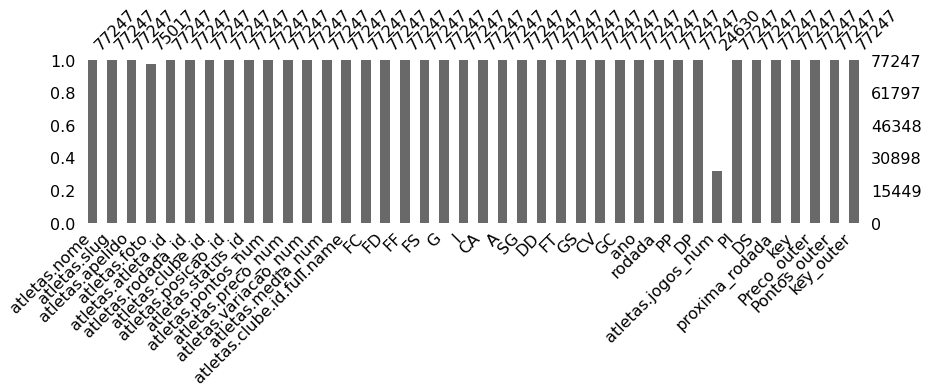

In [813]:
msno.bar(cartola_df_final, figsize=(14, 3))

In [814]:
cartola_df_final.head()

,atletas.nome,atletas.slug,atletas.apelido,atletas.foto,atletas.atleta_id,atletas.rodada_id,atletas.clube_id,atletas.posicao_id,atletas.status_id,atletas.pontos_num,...,PP,DP,atletas.jogos_num,PI,DS,proxima_rodada,key,Preco_outer,Pontos_outer,key_outer
0,Matheus Ferraz Pereira,matheus-ferraz,Matheus Ferraz,https://s.glbimg.com/es/sde/f/2018/03/17/6d461...,38632,1,AME,zag,Nulo,0.0,...,0.0,0.0,NaN,0.0,0.0,2,386322018AME2,6.00,0.0,386322018AME2
1,Willian Lanes de Lima,lima,Lima,https://s.glbimg.com/es/sde/f/2018/03/17/3d9ef...,38506,1,AME,zag,Nulo,0.0,...,0.0,0.0,NaN,0.0,0.0,2,385062018AME2,5.00,0.0,385062018AME2
2,Rómulo Otero Vásquez,otero,Otero,https://s.glbimg.com/es/sde/f/2017/04/03/9fe40...,83004,1,ATL,mei,Provável,16.5,...,0.0,0.0,NaN,0.0,3.0,2,830042018ATL2,19.83,11.3,830042018ATL2
3,Diego Ribas da Cunha,diego,Diego,https://s.glbimg.com/es/sde/f/2017/08/16/3ba37...,38909,1,FLA,mei,Provável,0.8,...,0.0,0.0,NaN,5.0,1.0,2,389092018FLA2,10.89,0.0,389092018FLA2
4,Rodrigo Eduardo Costa Marinho,rodriguinho,Rodriguinho,https://s.glbimg.com/es/sde/f/2018/03/20/c125f...,61033,1,COR,mei,Provável,16.5,...,0.0,0.0,NaN,5.0,1.0,2,610332018COR2,27.59,15.9,610332018COR2


In [815]:
cartola_df_final.columns

Index(['atletas.nome', 'atletas.slug', 'atletas.apelido', 'atletas.foto',
       'atletas.atleta_id', 'atletas.rodada_id', 'atletas.clube_id',
       'atletas.posicao_id', 'atletas.status_id', 'atletas.pontos_num',
       'atletas.preco_num', 'atletas.variacao_num', 'atletas.media_num',
       'atletas.clube.id.full.name', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA',
       'A', 'SG', 'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP',
       'atletas.jogos_num', 'PI', 'DS', 'proxima_rodada', 'key', 'Preco_outer',
       'Pontos_outer', 'key_outer'],
      dtype='object')

In [818]:
model_df = cartola_df_final.drop(columns=['atletas.nome','atletas.status_id', 'atletas.clube.id.full.name','atletas.slug', 'atletas.apelido', 'atletas.foto','atletas.atleta_id', 'atletas.rodada_id','atletas.jogos_num','proxima_rodada','key','key_outer'])

In [822]:
model_df = model_df.drop(columns=['atletas.status_id'])

In [823]:
model_df.columns

Index(['atletas.clube_id', 'atletas.posicao_id', 'atletas.pontos_num',
       'atletas.preco_num', 'atletas.variacao_num', 'atletas.media_num', 'FC',
       'FD', 'FF', 'FS', 'G', 'I', 'CA', 'A', 'SG', 'DD', 'FT', 'GS', 'CV',
       'GC', 'ano', 'rodada', 'PP', 'DP', 'PI', 'DS', 'Preco_outer',
       'Pontos_outer'],
      dtype='object')

In [824]:
#one hot encoding
model_df = pd.get_dummies(model_df,columns = ["atletas.posicao_id"],drop_first=True)

In [825]:
model_df.head()

,atletas.clube_id,atletas.pontos_num,atletas.preco_num,atletas.variacao_num,atletas.media_num,FC,FD,FF,FS,G,...,DP,PI,DS,Preco_outer,Pontos_outer,atletas.posicao_id_gol,atletas.posicao_id_lat,atletas.posicao_id_mei,atletas.posicao_id_tec,atletas.posicao_id_zag
0,AME,0.0,6.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.00,0.0,0,0,0,0,1
1,AME,0.0,5.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.00,0.0,0,0,0,0,1
2,ATL,16.5,14.81,9.81,16.5,1.0,2.0,2.0,2.0,1.0,...,0.0,0.0,3.0,19.83,11.3,0,0,1,0,0
3,FLA,0.8,10.89,-4.11,0.8,3.0,0.0,1.0,8.0,0.0,...,0.0,5.0,1.0,10.89,0.0,0,0,1,0,0
4,COR,16.5,23.08,6.08,16.5,1.0,0.0,0.0,2.0,2.0,...,0.0,5.0,1.0,27.59,15.9,0,0,1,0,0


In [826]:
model_df.drop(columns='atletas.clube_id',inplace=True)

In [827]:
model_df.columns

Index(['atletas.pontos_num', 'atletas.preco_num', 'atletas.variacao_num',
       'atletas.media_num', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA', 'A', 'SG',
       'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP', 'PI', 'DS',
       'Preco_outer', 'Pontos_outer', 'atletas.posicao_id_gol',
       'atletas.posicao_id_lat', 'atletas.posicao_id_mei',
       'atletas.posicao_id_tec', 'atletas.posicao_id_zag'],
      dtype='object')

In [828]:
#prepare column of interest 
train = model_df.drop(columns=['Pontos_outer','Preco_outer'])
test = model_df.loc[:,['Pontos_outer']]

In [829]:
# Prepare test and train datasets
x_train, x_test ,y_train ,y_test = train_test_split(train, test, random_state = 42, test_size=0.3)

In [852]:
x_train.columns

Index(['atletas.pontos_num', 'atletas.preco_num', 'atletas.variacao_num',
       'atletas.media_num', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA', 'A', 'SG',
       'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP', 'PI', 'DS',
       'atletas.posicao_id_gol', 'atletas.posicao_id_lat',
       'atletas.posicao_id_mei', 'atletas.posicao_id_tec',
       'atletas.posicao_id_zag'],
      dtype='object')

In [831]:
#Train model
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

<ipython-input-831-56e96a80bb1a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


RandomForestRegressor()

In [832]:
y_pred = forest.predict(x_test)

In [833]:
y_pred

array([0.789     , 3.6096    , 0.23848379, ..., 0.03      , 2.019     ,
       0.204     ])

In [834]:
print('Parameters currently in use:\n')
print(forest.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [835]:
#params for tunning
params = { 'max_features': range(2,10),# maximum amount of features a tree can choose from when splitting a node
    'max_depth':range(20,46,2),# maximum depth of the trees
    'min_samples_split':range(60,100,5), # minumum number of samples a node needs to split
    'min_samples_leaf':range(5,15), # minumin number of samples per leaf
    'bootstrap':[True,False], #unique random dataset for each tree
    'n_estimators': [100, 200, 300, 400,500]
} 

In [836]:
#hyperparameter tuning
rf_random = RandomizedSearchCV(forest,param_distributions =params,cv=5,verbose=2,n_jobs=-1,n_iter=100)

In [837]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 108.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(20, 46, 2),
                                        'max_features': range(2, 10),
                                        'min_samples_leaf': range(5, 15),
                                        'min_samples_split': range(60, 100, 5),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [838]:
#Best parameters for teh model
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 60,
 'min_samples_leaf': 5,
 'max_features': 3,
 'max_depth': 36,
 'bootstrap': True}

In [839]:
#Predict values for the Randomized search model 
random_y_pred = rf_random.predict(x_test) 

In [840]:
len(random_y_pred)

23175

In [841]:
#check model performance
mae= evaluate(rf_random,x_test,np.array(y_test))
print(f'Randomized search:\nmae: {mae}')

Randomized search:
mae: 1.99


In [842]:
#check model performance
mae= evaluate(forest,x_test,np.array(y_test))
print(f'Forest:\nmae: {mae}')

Forest:
mae: 2.06


In [843]:
with open('model','wb') as f:
    pickle.dump(rf_random,f)

In [844]:
with open('model','rb') as f:
    model_2 = pickle.load(f)

In [845]:
model_2.predict(x_test)

array([0.86731944, 3.84605221, 0.19450109, ..., 0.50004674, 2.91903604,
       0.28075051])

In [846]:
dump(rf_random, 'model.joblib')

['model.joblib']

In [847]:
model_3 = load('model.joblib') 

In [848]:
model_3.predict(x_test)

array([0.86731944, 3.84605221, 0.19450109, ..., 0.50004674, 2.91903604,
       0.28075051])